# Estimator Hello World

For this Hello World example we will be using the Hello World of Quantum Circuits:

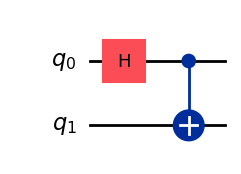

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

And we will also be using a Hello World of observables which can be defined in Qiskit in one of these two ways:

In [2]:
from qiskit.quantum_info import Pauli, SparsePauliOp
#O = SparsePauliOp.from_sparse_list([('XX',[0,1],1)],num_qubits=2)
observable = Pauli('XX')

## Algebra
The expectation value of an observable $O$ in state $\ket{\psi}$ is:  

$$\braket{O}=\braket{\psi|O|\psi}$$

Where $\ket{\psi}$ is the result of applying our circuit to the initial state vector $\ket{0}$:

$$\ket{\psi} = U\ket{0}$$

In our example:  

$$U = (I \otimes \ket{0} + X \otimes \ket{1})(I \otimes H) = $$

$$ = \left(\left[\begin{array}{cc}1 & 0 \\ 
0 & 1\end{array}\right] 
\otimes 
\left[\begin{array}{cc}1 & 0 \\ 
0 & 0\end{array}\right]+\left[\begin{array}{cc}0 & 1 \\ 
1 & 0\end{array}\right] 
\otimes 
\left[\begin{array}{cc}0 & 0 \\ 
0 & 1\end{array}\right]\right)
\left(\left[\begin{array}{cc}1 & 0 \\ 
0 & 1\end{array}\right] 
\otimes 
\frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 1 \\ 
1 & -1\end{array}\right]
\right) =$$

$$=\left(\left[\begin{array}{cc}1 & 0 & 0 & 0\\ 
0 & 0 & 0 & 0\\ 
0 & 0 & 1 & 0\\ 
0 & 0 & 0 & 0\end{array}\right] +
\left[\begin{array}{cc}0 & 0 & 0 & 0\\ 
0 & 0 & 0 & 1\\ 
0 & 0 & 0 & 0\\ 
0 & 1 & 0 & 0\end{array}\right]\right)
\frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 1 & 0 & 0\\ 
1 & -1 & 0 & 0\\ 
0 & 0 & 1 & 1\\ 
0 & 0 & 1 & -1\end{array}\right] = $$

$$=\frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 0 & 0 & 0\\ 
0 & 0 & 0 & 1\\ 
0 & 0 & 1 & 0\\ 
0 & 1 & 0 & 0\end{array}\right] 
\left[\begin{array}{cc}1 & 1 & 0 & 0\\ 
1 & -1 & 0 & 0\\ 
0 & 0 & 1 & 1\\ 
0 & 0 & 1 & -1\end{array}\right] = \frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 1 & 0 & 0\\ 
0 & 0 & 1 & -1\\ 
0 & 0 & 1 & 1\\ 
1 & -1 & 0 & 0\end{array}\right] $$ 

If we apply the circuit operator to our initial state vector:

$$\ket{\psi} = U\ket{0} = \frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 1 & 0 & 0\\ 
0 & 0 & 1 & -1\\ 
0 & 0 & 1 & 1\\ 
1 & -1 & 0 & 0\end{array}\right] 
\left[\begin{array}{cc}1\\ 
0\\ 
0\\ 
0\end{array}\right] = \frac{1}{\sqrt{2}}\left[\begin{array}{cc}1\\ 
0\\ 
0\\ 
1\end{array}\right] = \frac{1}{\sqrt{2}}(\ket{00}+\ket{11})$$ 

Now we calculate our observation:

$$ XX = \left[\begin{array}{cc}0 & 1 \\ 
1 & 0\end{array}\right] 
\otimes 
\left[\begin{array}{cc}0 & 1 \\ 
1 & 0\end{array}\right] = 
\left[\begin{array}{cc}0 & 0 & 0 & 1\\ 
0 & 0 & 1 & 0\\ 
0 & 1 & 0 & 0\\ 
1 & 0 & 0 & 0\end{array}\right] 
$$

And finally we estimate the expectation of our observable:

$$\braket{O}=\braket{\psi|O|\psi} = \frac{1}{\sqrt{2}}\left[\begin{array}{cc}1 & 0 & 0 & 1\end{array}\right]
\left[\begin{array}{cc}0 & 0 & 0 & 1\\ 
0 & 0 & 1 & 0\\ 
0 & 1 & 0 & 0\\ 
1 & 0 & 0 & 0\end{array}\right]
\frac{1}{\sqrt{2}}\left[\begin{array}{cc}1\\ 
0\\ 
0\\ 
1\end{array}\right] = \frac{1}{2}\left[\begin{array}{cc}1 & 0 & 0 & 1\end{array}\right] \left[\begin{array}{cc}1\\ 
0\\ 
0\\ 
1\end{array}\right] = 1
$$

## Qiskit
Now we will use Qiskity to do the math.

First we will define the initial statevector $\ket{00}$.

In [3]:
from qiskit.quantum_info import Statevector

sv = Statevector([1,0,0,0]) 
sv.draw('latex')

<IPython.core.display.Latex object>

Now we apply the circuit to the statevector to obtain $\ket{\psi}$:

In [4]:
sv2 = sv.evolve(qc)
sv2.draw('latex')

<IPython.core.display.Latex object>

And finally we obtain the estimation for our observable:
$$ \braket{O} = \braket{\psi|O|\psi} $$ 

In [5]:
sv2.expectation_value(observable)

0.9999999999999998

## Qiskit (Estimator)
Now we will use an Estimator to obtain the estimation for our observable.

In [6]:
from qiskit.primitives import StatevectorEstimator

estimator = StatevectorEstimator()

job = estimator.run([(qc, observable)])
result = job.result()

In [7]:
result[0].data.evs

array(1.)

## Qiskit (Matrices)
Finally, for completeness, we will use the data and execute the math 'manually'.
The initial statevector is:

In [8]:
zeroes = sv.data
zeroes

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

The unitary array for the circuit is:

In [9]:
from qiskit.quantum_info import Operator

U = Operator(qc).data
U

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
        -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
         0.        +0.j]])

And the observable is:

In [10]:
MObs = observable.to_matrix()
MObs

array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

Now we apply the circuit to our statevector:

In [11]:
Psi = U @ zeroes
MPsi = Operator(Psi).data

And finally find the estimation for the observable:

In [12]:
estimate = MPsi.T @ MObs @ MPsi
estimate

np.complex128(0.9999999999999998+0j)